# <span style='color:purple; font-weight:bold'> MinMaxScaler</span>             

MinMax Scaling (Normalization) is a data preprocessing technique that transforms features by rescaling them to a fixed range, typically [0, 1].             

# <span style='color:purple; font-weight:bold'> Key Concepts</span>                 

-  <span style='color:blue; font-weight:bold'> Formula:</span> The core formula for scaling a value \(x\) to the range [0, 1] is: $$(x_{scaled}=\frac{x-x_{min}}{x_{max}-x_{min}})$$        

- <span style='color:blue; font-weight:bold'> Purpose:</span> It rescales all features to a standard range, preventing features with large values from dominating the learning process of certain algorithms.           

- <span style='color:blue; font-weight:bold'> Use Cases:</span> It's especially useful for algorithms that rely on distance measures (like k-nearest neighbors and k-means) or use gradient descent optimization (like neural networks and logistic regression). It also works well when the data distribution is not Gaussian.             

- <span style='color:blue; font-weight:bold'> Sensitivity to Outliers:</span> MinMax scaling is highly sensitive to outliers because the minimum and maximum values are used directly in the calculation. Extreme values can distort the entire scaling range.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Create a sample DataFrame with deliberately different scales
data = {
    'Feature_A': [10, 50, 100, 20, 80, 5, 95], # Range ~90
    'Feature_B': [1000, 3000, 5000, 1200, 4500, 900, 4800] # Range ~4100
}
df = pd.DataFrame(data)

print("--- Original DataFrame (Note the huge scale difference) ---")
display(df)

print(f"\nFeature A Range: to {df['Feature_A'].max()}")
print(f"Feature B Range: {df['Feature_B'].min()} to {df['Feature_B'].max()}")


--- Original DataFrame (Note the huge scale difference) ---


,Feature_A,Feature_B
0,10,1000
1,50,3000
2,100,5000
3,20,1200
4,80,4500
5,5,900
6,95,4800



Feature A Range: to 100
Feature B Range: 900 to 5000


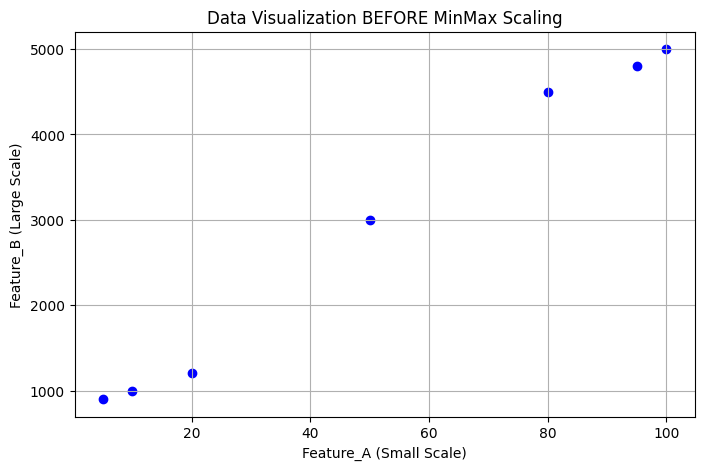

The blue points look vertically aligned because Feature B dominates the plot's scale.


In [45]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Feature_A'], df['Feature_B'], color='blue')
plt.title('Data Visualization BEFORE MinMax Scaling')
plt.xlabel('Feature_A (Small Scale)')
plt.ylabel('Feature_B (Large Scale)')
plt.grid(True)
plt.show()

print("The blue points look vertically aligned because Feature B dominates the plot's scale.")


In [46]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
# We apply it to all columns in the DataFrame
df_scaled_array = scaler.fit_transform(df[['Feature_A', 'Feature_B']])

# Convert the resulting NumPy array back to a Pandas DataFrame for easy viewing
df_scaled = pd.DataFrame(df_scaled_array, columns=['Feature_A_Scaled', 'Feature_B_Scaled'])

print("--- Scaled DataFrame ---")
display(df_scaled)
print(f"Minimum value across all scaled features: {df_scaled.min().min()}")
print(f"Maximum value across all scaled features: {df_scaled.max().max()}")


--- Scaled DataFrame ---


,Feature_A_Scaled,Feature_B_Scaled
0,0.052632,0.024390
1,0.473684,0.512195
2,1.000000,1.000000
3,0.157895,0.073171
4,0.789474,0.878049
5,0.000000,0.000000
6,0.947368,0.951220


Minimum value across all scaled features: 0.0
Maximum value across all scaled features: 1.0


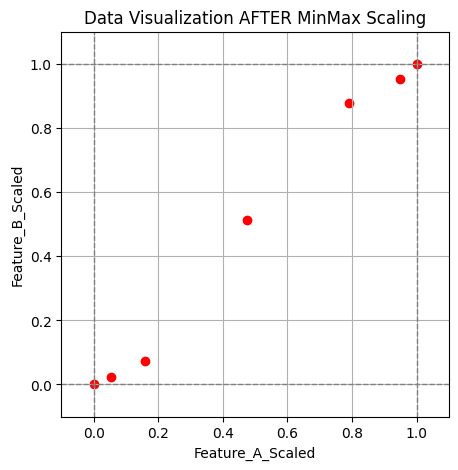

The red points now show the true spread of the data, as both features are on an equal footing.


In [49]:
plt.figure(figsize=(5, 5)) # Use a square figure to emphasize equal weighting
plt.scatter(df_scaled['Feature_A_Scaled'], df_scaled['Feature_B_Scaled'], color='red')
plt.title('Data Visualization AFTER MinMax Scaling')
plt.xlabel('Feature_A_Scaled')
plt.ylabel('Feature_B_Scaled')
plt.grid(True)
# Ensure both axes have the exact same limits (0 to 1)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

# Adding vertical and horizontal lines at 0 and 1 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.axhline(1, color='gray', linestyle='--', linewidth=1)
plt.axvline(1, color='gray', linestyle='--', linewidth=1)
plt.show()

print("The red points now show the true spread of the data, as both features are on an equal footing.")
